In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector

In [137]:
accept = QuantumRegister(1, name="accept")
detain = QuantumRegister(1, name="detain")
bribe = QuantumRegister(1, name="bribe")

ancilla = QuantumRegister(4, name="ancilla")

false_info = QuantumRegister(3, name="false_info")
documents = QuantumRegister(3, name="documents")

 qubit    | relative
----------|----------
documents0|passport
documents1|entry pass
documents2|complementary id

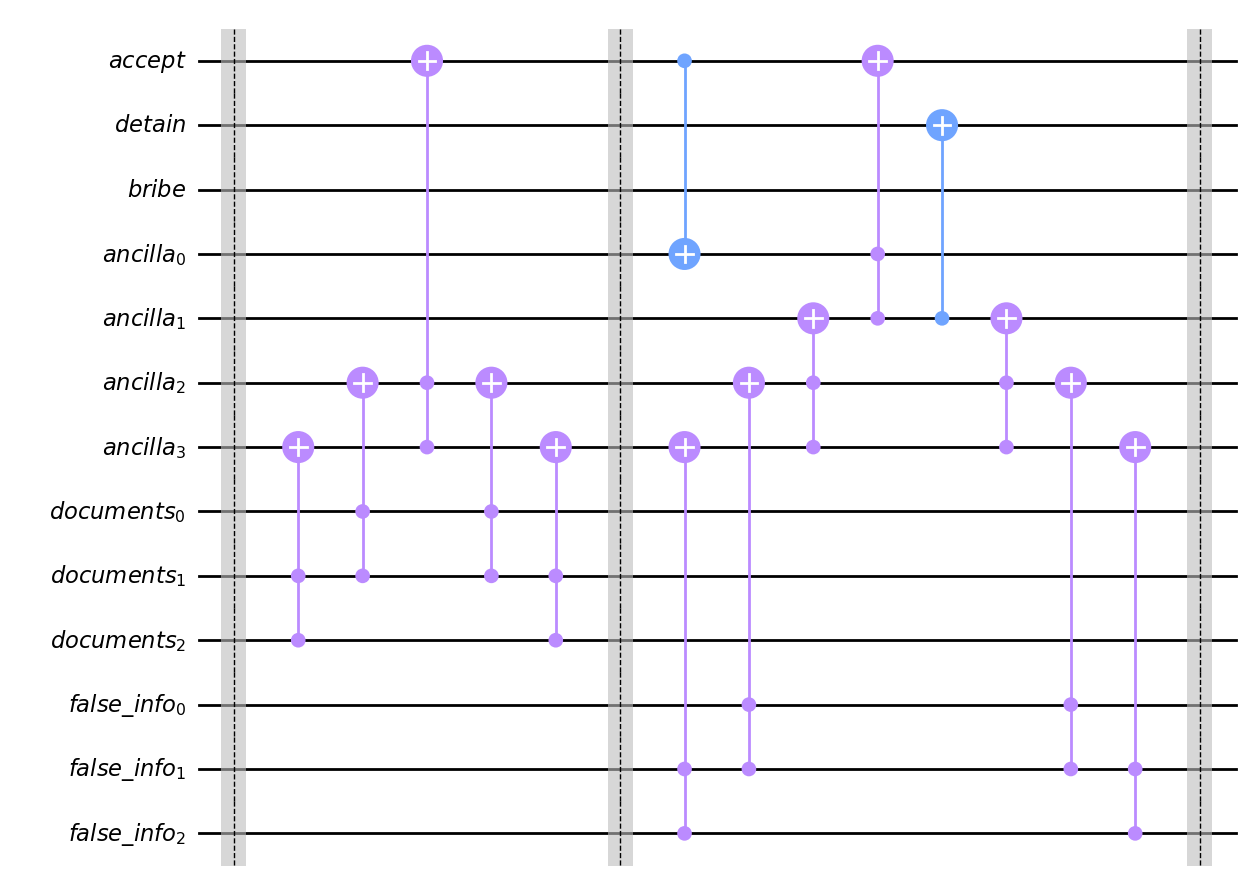

<IPython.core.display.Latex object>

In [157]:
qc = QuantumCircuit(accept, detain, bribe, ancilla, documents, false_info)

qc.barrier()

qc.ccx(documents[2], documents[1], ancilla[3])
qc.ccx(documents[1], documents[0], ancilla[2])

qc.ccx(ancilla[3], ancilla[2], accept)

qc.ccx(documents[1], documents[0], ancilla[2])
qc.ccx(documents[2], documents[1], ancilla[3])

qc.barrier()

qc.cx(accept, ancilla[0])

qc.ccx(false_info[2], false_info[1], ancilla[3])
qc.ccx(false_info[1], false_info[0], ancilla[2])

qc.ccx(ancilla[3], ancilla[2], ancilla[1])
qc.ccx(ancilla[1], ancilla[0], accept)
qc.cx(ancilla[1], detain)

qc.ccx(ancilla[3], ancilla[2], ancilla[1])

qc.ccx(false_info[1], false_info[0], ancilla[2])
qc.ccx(false_info[2], false_info[1], ancilla[3])




qc.barrier()


display(qc.draw("mpl"))
Statevector(qc).draw("latex")

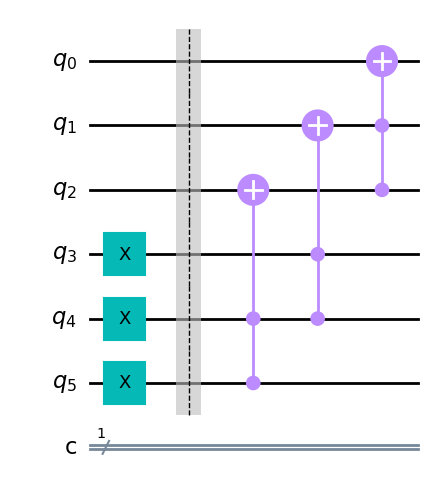

<IPython.core.display.Latex object>

In [124]:
qc_test = QuantumCircuit(6, 1)

qc_test.x(3)
qc_test.x(4)
qc_test.x(5)

qc_test.barrier()
qc_test.ccx(5, 4, 2)
qc_test.ccx(4, 3, 1)
qc_test.ccx(2, 1, 0)

display(qc_test.draw("mpl"))
Statevector(qc_test).draw("latex")